In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [3]:
df = pd.read_csv(r'D:\HACKATHON\Spam_SMS.csv', encoding='utf-8-sig')

C:\Users\nithi\AppData\Local\Temp\ipykernel_28596\3557019881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


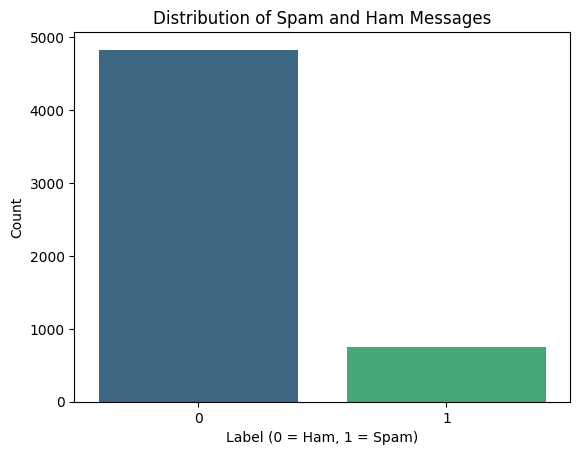

In [4]:
# Clean column names
df.columns = df.columns.str.strip()

# Rename columns
df = df.rename(columns={'Class': 'label', 'Message': 'message'})

# Map labels to numerical values
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Check class distribution
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()

In [5]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)


MultinomialNB()

Accuracy: 0.9847533632286996

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.96      0.93      0.95       161

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



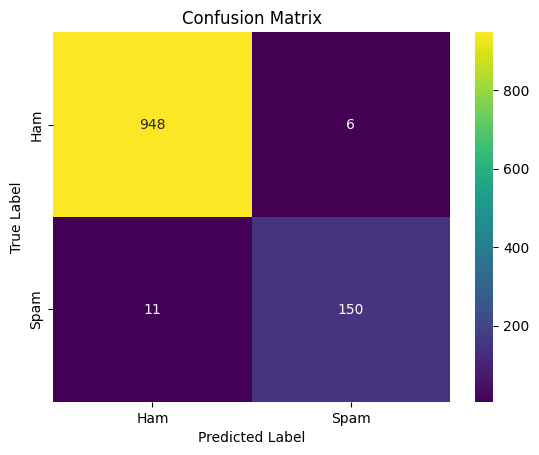

In [8]:
y_pred = model.predict(X_test_vect)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:

def test_sample_messages():
    example_messages = ["Win a free iPhone now!", "Hi, how are you doing today?"]
    example_vect = vectorizer.transform(example_messages)
    predictions = model.predict(example_vect)
    for msg, pred in zip(example_messages, predictions):
        print(f"Message: {msg} --> {'Spam' if pred == 1 else 'Ham'}")

# Run the test
test_sample_messages()

Message: Win a free iPhone now! --> Spam
Message: Hi, how are you doing today? --> Ham
